In [2]:
import pandas as pd
import matplotlib.pyplot as plt

The objectives of this analysis are as follows:

To understand exoplanets.

To make a quick analysis in order to grasp the nature of the data set.

To become familiar with the data so as to facilitate further analysis efforts.

## Information about the dataset

The NASA Exoplanet Archive is a database that contains information on all known exoplanets (planets outside our solar system) discovered by NASA's various space missions, ground-based observatories, and other sources. The dataset includes information such as the planet's name, mass, radius, distance from its host star, orbital period, and other physical characteristics. The dataset also includes information on the host star, such as its name, mass, and radius. The archive is updated regularly as new exoplanets are discovered, and it is a valuable resource for astronomers studying the properties and distribution of exoplanets in our galaxy.

# Dataset

In [3]:
exoplanets = pd.read_csv("cleaned_5250.csv")
exoplanets.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


name: Name of the planet as per given by NASA.

distance: Distance of the planet from earth in light years.

stellar_magnitude: Brightness of the planet, the brighter the planet the lower number is assigned to the planet.

planet_type: Type of the planet, these types are derived from our solar system planets.

discovery_year: Year in which planet got discovered.

mass_multiplier: Mass multiplier of the planet with mass_wrt planet.

mass_wrt: Mass of the planet in comparison with the mass of planets of our solar system.

radius_multiplier: Radius multiplier of the planet with radius_wrt planet.

radius_wrt: Radius of the planet in comparison with the radius of planets of our solar system.

orbital_radius: Orbital radius of planets orbiting around their sun (in AU).

In [5]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [6]:
exoplanets.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


# Data Visualisation

Let's look at some values and learn about the dataset.

Here we can see the exoplanet detection methods that are used overtime.

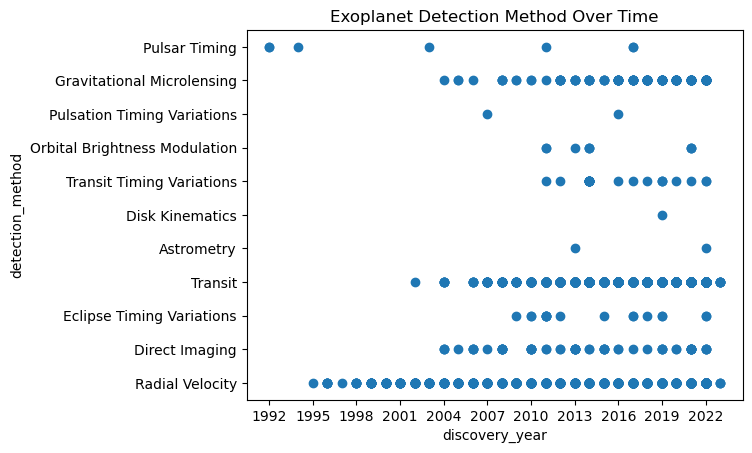

In [43]:
plt.scatter(exoplanets["discovery_year"], exoplanets['detection_method'])
plt.xlabel('discovery_year')
plt.xticks(range(1992, 2023, 3))
plt.ylabel('detection_method')
plt.title("Exoplanet Detection Method Over Time")
plt.show()

Now let's look at in which year did we explore the most exoplanet.

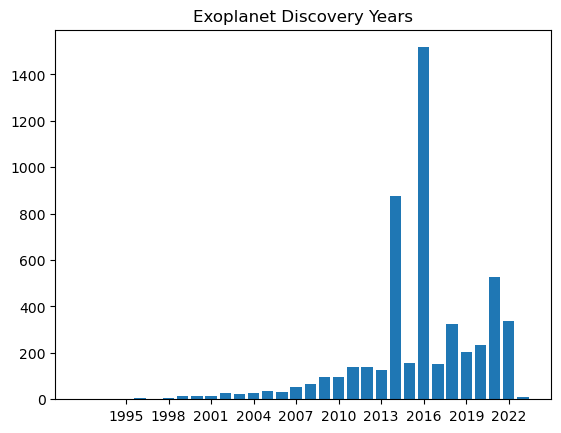

In [32]:
exoplanets["year"] = exoplanets["discovery_year"].astype(int)
grouped = exoplanets.groupby("year")["name"].count()
plt.bar(grouped.index, grouped.values)
plt.xticks(range(1995,2023, 3))
plt.title("Exoplanet Discovery Years")
plt.show()

The majority of the exoplanets that were discovered in 2016 were found by Kepler. In fact, 2016 was the year that Kepler announced its largest batch of exoplanet discoveries, with over 700 new planets being found. These discoveries helped to further our understanding of exoplanets and the universe as a whole.

Now let's learn about planet types.

In [33]:
exoplanets["planet_type"].value_counts()

Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Unknown            5
Name: planet_type, dtype: int64

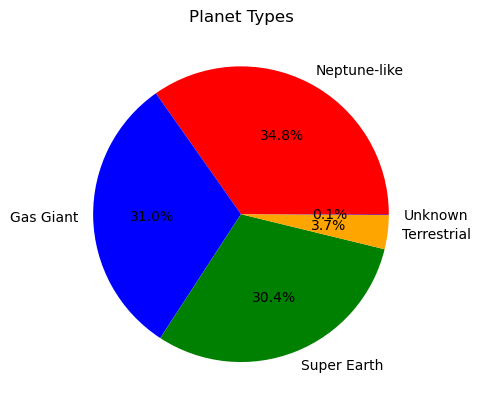

In [34]:
values = [1825, 1630, 1595, 195, 5]
labels = ["Neptune-like", "Gas Giant", "Super Earth", "Terrestrial", "Unknown"]
colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Planet Types")
plt.show()

## Correlation Coefficient

We can compare some values and review their connection with correlation coefficient. The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. It is a number between -1 and 1.

This is the equation for correlation coefficient:

r = (∑(x - x̄)(y - ȳ)) / √(∑(x - x̄)^2)√(∑(y - ȳ)^2)

But we can make use of Pandas to do the math for us.

In [37]:
brightness_year = exoplanets[["stellar_magnitude", "discovery_year", "name"]].set_index("name")
brightness_year

,stellar_magnitude,discovery_year
name,,
11 Comae Berenices b,4.72307,2007
11 Ursae Minoris b,5.01300,2009
14 Andromedae b,5.23133,2008
14 Herculis b,6.61935,2002
16 Cygni B b,6.21500,1996
...,...,...
XO-7 b,10.52100,2019
YSES 2 b,10.88500,2021
YZ Ceti b,12.07400,2017


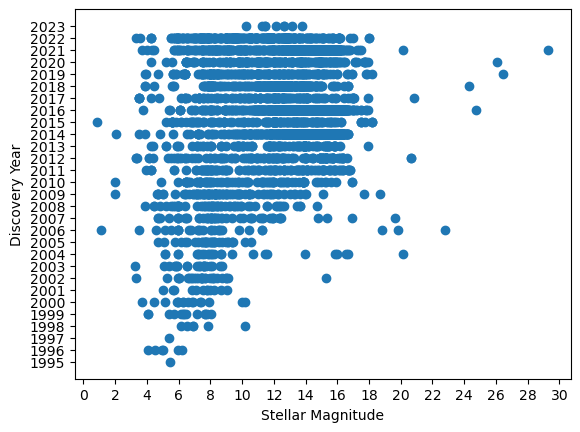

In [38]:
exoplanets_under_30 = exoplanets.query("stellar_magnitude < 30")

plt.scatter(exoplanets_under_30['stellar_magnitude'].values, exoplanets_under_30['discovery_year'].values)
plt.xlabel('Stellar Magnitude')
plt.ylabel('Discovery Year')
plt.yticks(range(1995, 2024, 1))
plt.xticks(range(0, 31, 2))
plt.show()

In [39]:
correlation_coefficient = exoplanets["discovery_year"].corr(exoplanets["stellar_magnitude"])
correlation_coefficient

0.21800990617460148

A correlation coefficient of 0.21 indicates a weak positive correlation between two variables. This means that as one variable increases, the other variable is likely to increase, but the relationship is not very strong. We can see a weak connection from the graph as well.

This means that as the stellar magnitude increases (indicating a fainter star), there is a slight tendency for the discovery year to be more recent. However, the relationship is not very strong.

Implications: This correlation suggests that the weak correlation coefficient implies that the variability in discovery year cannot be fully explained by stellar magnitude alone. Other factors such as observational biases, mission durations, and survey strategies may also influence the distribution of discovery years.

Let's look at some other variables:

In [41]:
brightness_distance = exoplanets[["stellar_magnitude", "distance", "name"]].set_index("name")
brightness_distance

,stellar_magnitude,distance
name,,
11 Comae Berenices b,4.72307,304.0
11 Ursae Minoris b,5.01300,409.0
14 Andromedae b,5.23133,246.0
14 Herculis b,6.61935,58.0
16 Cygni B b,6.21500,69.0
...,...,...
XO-7 b,10.52100,764.0
YSES 2 b,10.88500,357.0
YZ Ceti b,12.07400,12.0


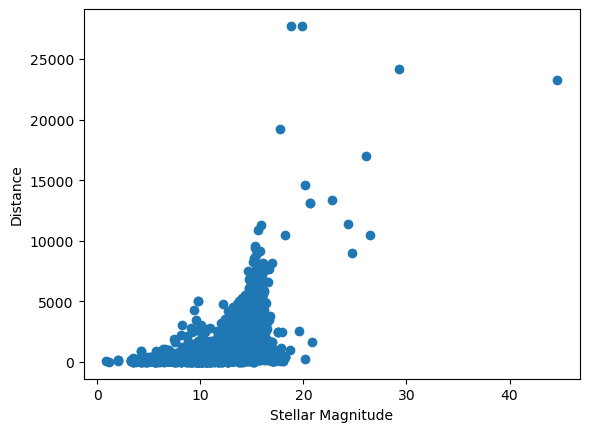

In [44]:
plt.scatter(exoplanets['stellar_magnitude'].values, exoplanets['distance'].values)
plt.xlabel('Stellar Magnitude')
plt.ylabel('Distance')
plt.show()

In [42]:
correlation_coefficient1 = exoplanets["distance"].corr(exoplanets["stellar_magnitude"])
correlation_coefficient1

0.6145418442403302

As expected, our value is higher. A correlation coefficient of 0.61 indicates a moderate positive correlation between two variables. This means that as one variable increases, the other variable is likely to increase, and the relationship is somewhat strong, meaning as the stellar magnitude increases (indicating a fainter star), the exoplanets tend to be located at greater distances from Earth. Because there are other factors that influence one another, a higher value is not expected.

In summary, the moderate positive correlation between stellar magnitude and exoplanet distance indicates that as stellar magnitude increases, exoplanets tend to be found at greater distances from Earth, but this relationship is influenced by other factors as well.